# Prediction of song ‘popularity’ based on industrial metrics on Spotify 
    The music industry is so filled with ambiguity and diversity that even artists are surprised when one of their many songs which they’ve spent the same amount of effort on makes it on the big charts. In our upcoming project, we will attempt to find shared characteristics between English songs which have made it onto the top hits on Spotify. The characteristics used to find a trend among the top hits will be danceability, valence, energy, acousticness , instrumentalness, liveliness and speechiness in the provided dataset containing 954 songs which made it onto the Spotify top 100 playlist in 2022(link).  

- Connect jupyter notebook to gitHUB
- Import spotifty top hits and rename its columns
- Get a randomly created spotify playlist with english songs (ensure there are no duplicates)
- Get information of all tracks in the playlist using API
- merge data into one with one appended row, factor: yes or no. for wether song is a top hit or not
- use histograms and facet grids to explore the distribution of each attribute for top htis and not top hits.

In [1]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
spotify_top_hits <- read_csv("data/reframed-spotify-2023.csv") |> 
    select("bpm":"speechiness_%")


Rows: 953 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): track_name, artist(s)_name, streams, key, mode
dbl (17): artist_count, released_year, released_month, released_day, in_spot...
num  (2): in_deezer_playlists, in_shazam_charts

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


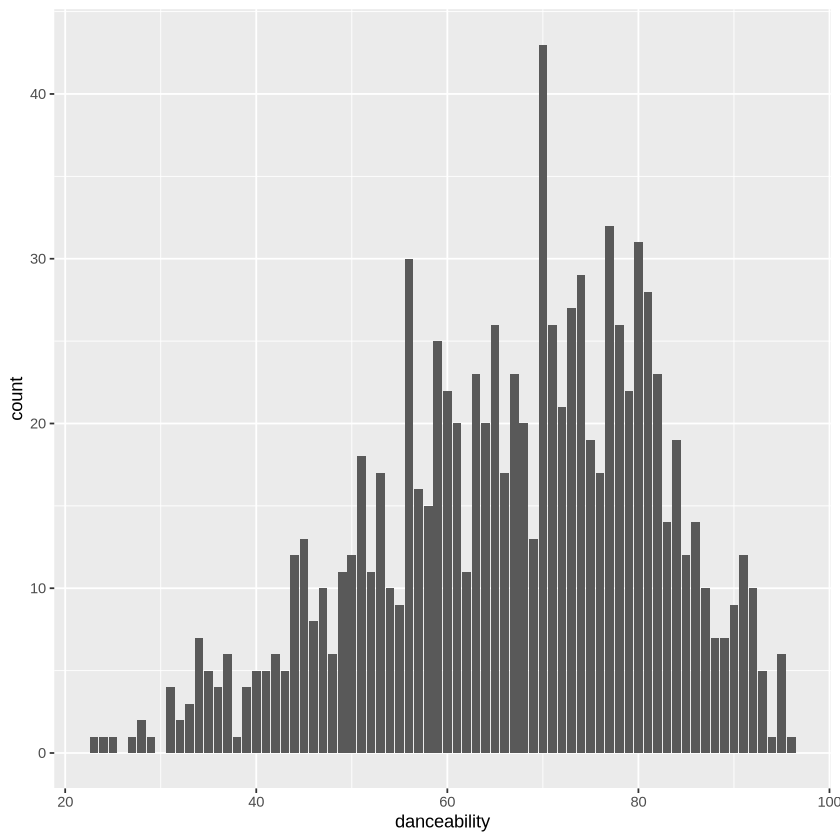

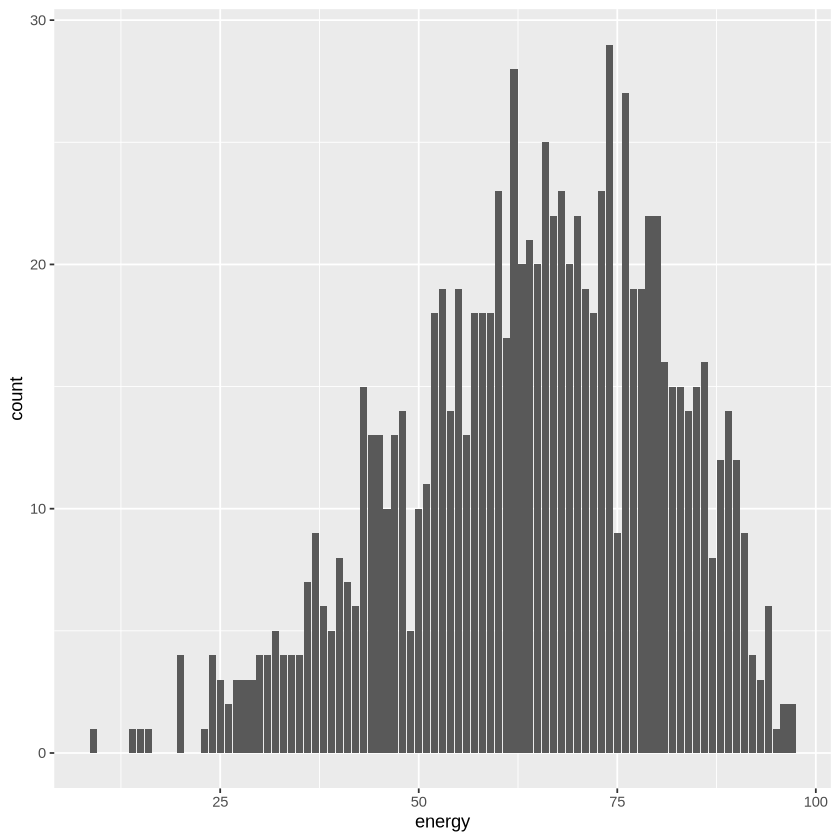

In [7]:

## danceability spread of top hits
danceability <- spotify_top_hits |> 
    select("danceability_%") 
colnames(danceability)[1] <- "danceability"

dance_plot <- danceability |> 
    ggplot(aes(x=danceability)) + 
    geom_histogram(stat="count")
dance_plot



## energy spread of top hits
energy <- spotify_top_hits |>
    select("energy_%")
colnames(energy)[1] <- "energy"

energy_plot <- energy |> 
    ggplot(aes(x=energy)) +
    geom_histogram(stat="count") 

energy_plot